In [5]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.naive_bayes import  GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#load data
df=pd.read_csv('data.csv')
df.head


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [3]:
df.isnull().sum()
df=df.drop(columns=['Unnamed: 32'])


In [4]:
#drop unnecessary columns
cols_to_drop=[col for col in df.columns if 'se' in col or 'worst' in col]
df.drop(columns=cols_to_drop,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [10]:
#encoding
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

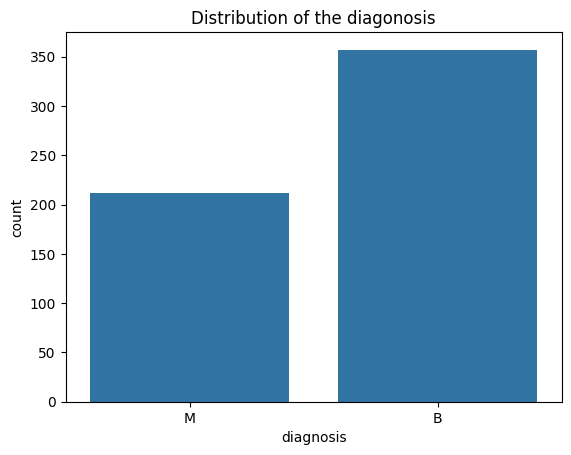

In [6]:
#visualization
sns.countplot(x='diagnosis',data=df)
plt.title("Distribution of the diagonosis")
plt.show()

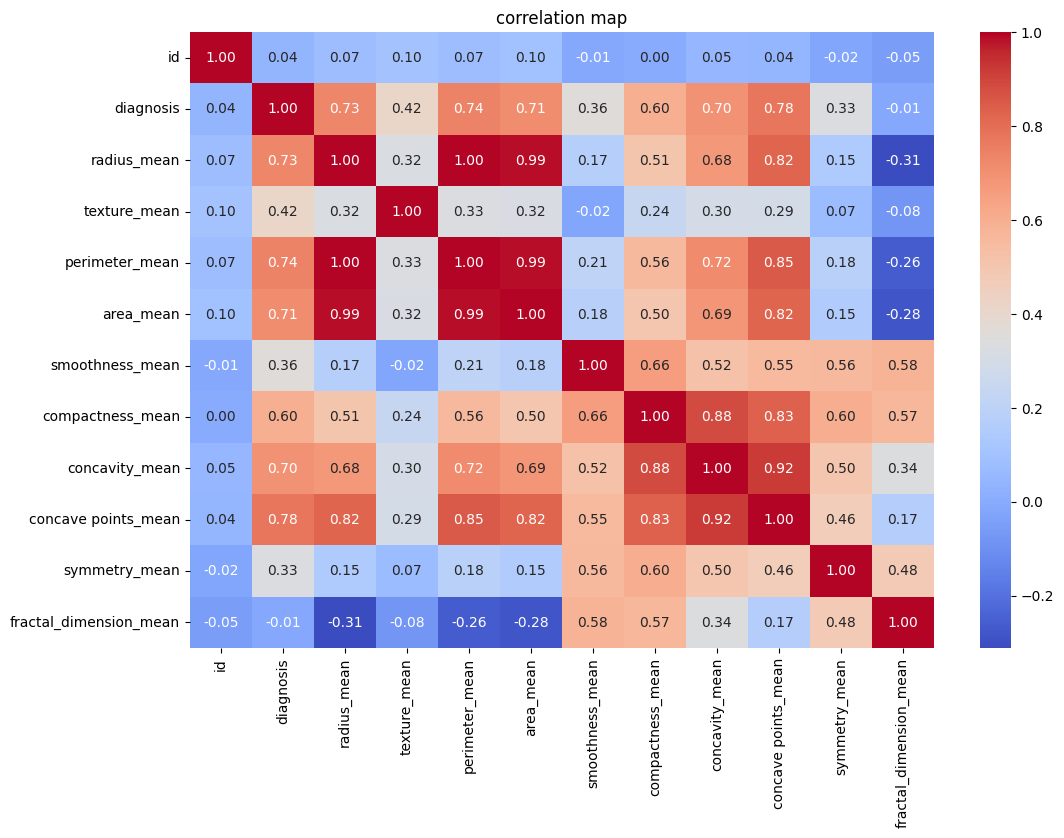

In [11]:
#coorealation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("correlation map")
plt.show()

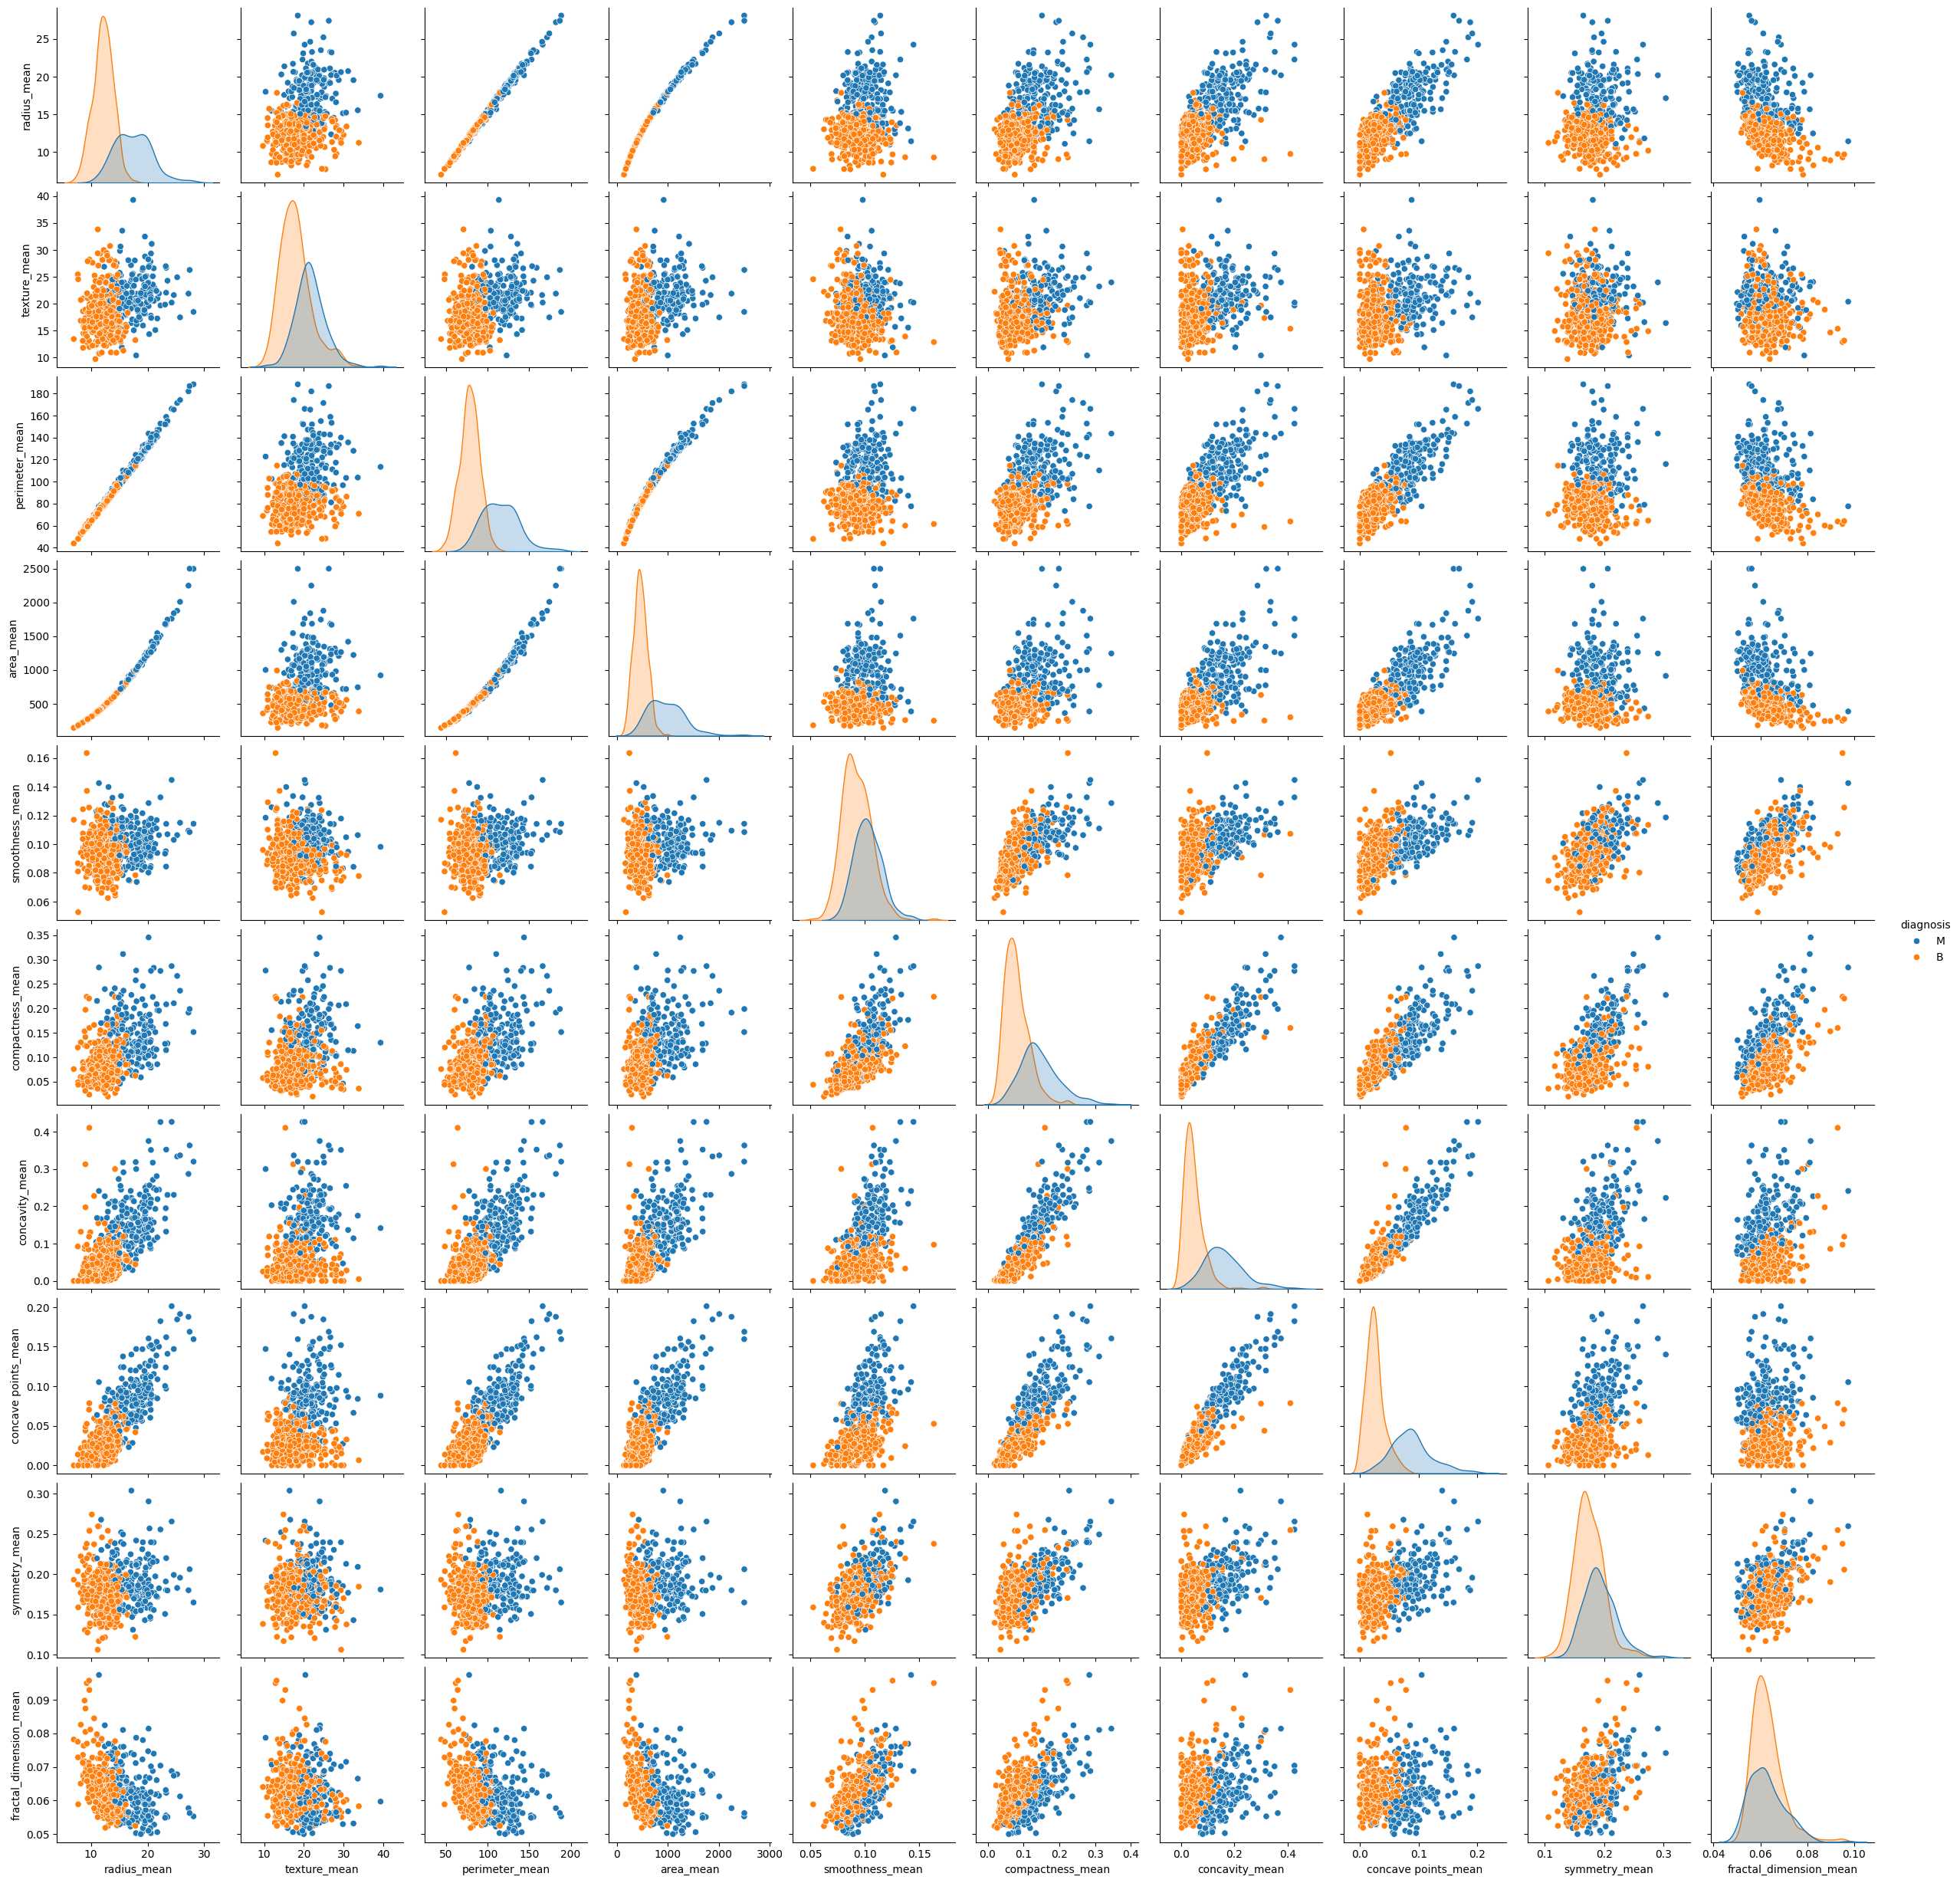

In [8]:
mean_cols = [col for col in df.columns if 'mean' in col] + ['diagnosis']
sns.pairplot(df[mean_cols], hue='diagnosis')
plt.show()


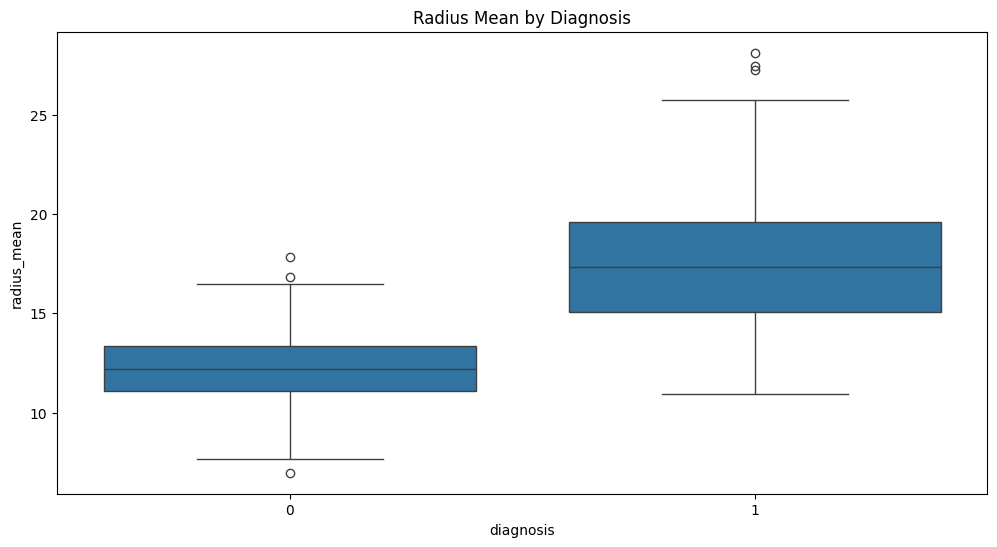

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Radius Mean by Diagnosis')
plt.show()


In [13]:
X=df.drop(columns=['diagnosis'])
y=df['diagnosis']


In [14]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)


In [15]:
#scaling
standardscaling=StandardScaler()
X_train=standardscaling.fit_transform(X_train)
X_test=standardscaling.fit_transform(X_test)

In [16]:
#training
model=GaussianNB()
model.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [17]:
#predictions
y_pred=model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9057017543859649

Confusion Matrix:
 [[267  23]
 [ 20 146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       290
           1       0.86      0.88      0.87       166

    accuracy                           0.91       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.91      0.91      0.91       456

